### Import data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import gzip
import pickle
with gzip.open('consumer_complaint_dataset.data', 'rb') as f:
    data = pickle.load(f)

In [3]:
data

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...
...,...,...
492250,Consumer Loan,I was on automatic payment for my car loan. In...
492251,Debt collection,I recieved a collections call from an unknown ...
492252,Mortgage,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who..."
492253,Mortgage,I can not get from chase who services my mortg...


In [4]:
# drop duplicates
data = data.drop_duplicates()
data

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...
...,...,...
492250,Consumer Loan,I was on automatic payment for my car loan. In...
492251,Debt collection,I recieved a collections call from an unknown ...
492252,Mortgage,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who..."
492253,Mortgage,I can not get from chase who services my mortg...


### Normalize data

In [5]:
# loc one lone
data.loc[0, 'input']

'transworld systems inc. \nis trying to collect a debt that is not mine, not owed and is inaccurate.'

In [6]:
import re
RE_BAD_SYMBOLS = re.compile(r'[&#<>{}\[\]\\]')
def impurity(text, min_len=10):
    # Returns the share of bad characters in a text
    if text == None or len(text) < min_len:
        return 0
    return len(RE_BAD_SYMBOLS.findall(text)) / len(text)

data['impurity'] = data['input'].apply(impurity)

In [7]:
# sort by impurity
data.sort_values(by='impurity', ascending=False).head(10)

,topic,input,impurity
287977,Student loan,Being charged two late fees per month in XX/XX...,0.119497
121450,Debt collection,"Fedloan servicing {$1700.00}, {$4000.00}, {$26...",0.115385
238476,"Payday loan, title loan, or personal loan",I was not expecting to pay for this long I was...,0.103257
50348,"Payday loan, title loan, or personal loan",Trying to settle with this company they told m...,0.096470
106936,Checking or savings account,XX/XX/18 XXXX {$39.00} XXXX XXXX {$34.00} XXXX...,0.096386
444044,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX {$330.00} XX/XX/XXXX {$76.00} {...,0.095238
157055,"Payday loan, title loan, or personal loan",I took out a loan with Big Picture Loans for {...,0.094796
416102,Student loan,I checked my credit report recently and notice...,0.093856
15413,"Credit reporting, credit repair services, or o...",These items below do not belong to me at all. ...,0.093333
19244,"Credit reporting, credit repair services, or o...",These accounts are fraudulent XXXX {$550.00} X...,0.090141


In [8]:
print('impurity : ', impurity(data.loc[287977, 'input']))
print(data.loc[287977, 'input'])

impurity :  0.11949685534591195
Being charged two late fees per month in XX/XX/XXXX, XX/XX/XXXX & XX/XX/XXXX. Accounts were charged off on credit report in XX/XX/XXXX but they are being reported monthly on report as on today.
Charged late fees when payments were made XX/XX/XXXX, XX/XX/XXXX & XX/XX/XXXX. Charged " repayment '' fee in XX/XX/XXXX and XX/XX/XXXX.
Charged for forbearance in XX/XX/XXXX. XX/XX/XXXX Late Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXX Late Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXX Late Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXX Late Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXX Late Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXXLate Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXX Late Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXXLate Fee {$0.00} {$0.00} {$7.00} {$7.00} XX/XX/XXXX Late Fee {$0.00} {$0.00} {$10.00} {$10.00} XX/XX/XXXX Late Fee {$0.00} {$0.00} {$10.00} {$10.00} XX/XX/XXXXLate Fee {$0.00} {$0.00} - {$2.00} - {$2.00} XX/XX/XXXXLate Fee {$0

In [9]:
import html
def clean(text):
    # convert htnl escapes like &amp; to characters.
    text = html.unescape(text)
    # tags lomke <table> and <a href> are not needed
    text = re.sub(r'<[^>]*>', '', text)
    # markdown URLs like [Some text](http://...) are keep the text
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in backticks like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standaLone sequence of speacials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(z/:\s|$)', ' ', text)
    # standLone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white space
    text = re.sub(r'\s+', ' ', text)
    #  XX/XX/XXXX to _DATE_
    text = re.sub(r'\w{1,2}/\w{1,2}/\w{2,4}', ' _DATE_ ', text)
    #  XX/XX/XX to _CREDIT_CARD_
    text = re.sub(r'([XXXX] [XXXX] [XXXX])|([XXXX] [XXXX])', ' _CREDIT_CARD_ ', text)
    #  {$###.##} to _MONEY_
    text = re.sub(r'{\$\d{1,7}[(,\d{1,4})|(\.\d{2})]|[(\d{1,7}]|[(x)*]}', ' _MONEY_ ', text)
    # XXXX to _4LC_ is the latest 4 letters of the credit card
    text = re.sub(r'XXXX', ' _4LC_ ', text)
    # & to and
    text = re.sub(r'&', 'and', text)
    # space when ..\.. to .. / ..
    text = re.sub(r' .\w*\\\\w* ', '\1 / \2', text)
    return text.strip()

In [10]:
data['clean_input'] = data['input'].apply(clean)
data['clean_impurity'] = data['clean_input'].apply(impurity)
# sort by clean_impurity
data.sort_values(by='clean_impurity', ascending=False).head(10)

,topic,input,impurity,clean_input,clean_impurity
192175,"Credit reporting, credit repair services, or o...",I've called all 3 credit bureaus about these h...,0.070352,I've called all _MONEY_ credit bureaus about...,0.059155
469480,"Credit reporting, credit repair services, or o...",I've called all 3 credit bureaus about these h...,0.072165,I've called all _MONEY_ credit bureaus about...,0.058659
469477,"Credit reporting, credit repair services, or o...",I've called all 3 credit bureaus about these h...,0.070470,I've called all _MONEY_ credit bureaus about...,0.058414
202752,"Credit reporting, credit repair services, or o...",XXXX XXXX and XXXX XXXX opened a credit card i...,0.023614,XXX _CREDIT_CARD_ XXX and XXX _CREDIT_CARD_ XX...,0.045840
241913,"Credit reporting, credit repair services, or o...",XXXX XXXX and XXXX XXXX opened a credit card ...,0.023560,XXX _CREDIT_CARD_ XXX and XXX _CREDIT_CARD_ XX...,0.045493
88802,Mortgage,Faxed in mod said bk???? have been faxing for ...,0.037975,Faxed in mod said bk???? have been faxing for ...,0.037975
448534,"Credit reporting, credit repair services, or o...",XX/XX/XXXX CN # XXXX XX/XX/XXXX CN # XXXX XX/X...,0.035533,_DATE_ CN # _4LC_ _DATE_ CN # _4LC_ _D...,0.034483
62395,"Credit reporting, credit repair services, or o...",1. The second mortgage STILL is not being auto...,0.040426,_MONEY_ . The second mortgage STILL is not bei...,0.032178
272378,"Credit reporting, credit repair services, or o...","the following accounts are not mine, please ha...",0.052142,the following accounts are not mine _MONEY_ p...,0.031818
201573,"Credit reporting, credit repair services, or o...",CAPITAL ONE CC # XXXX HAS BEEN PAID OFF > STIL...,0.031250,CAPITAL ONE CC # _4LC_ HAS BEEN PAID OFF > S...,0.029851


In [11]:
data.loc[192175, 'clean_input']

"I've called all  _MONEY_  credit bureaus about these hard inquiries that appeared on my credit score. I've spoken with consumer service and they did not do anything. All year long I have been fighting these hard inquiries and recently notice more duplicate inquires and some that re-appeared from  _MONEY_  years ago.  _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  Equifax > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_  > _4LC_"

In [12]:
#count where impurity == 0
data[data['clean_impurity'] > 0].shape

(39353, 5)

### Prepare the data

In [13]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import string

In [14]:
# tokenize the sentences and remove stop words
def tokenize(text):
    text = text.lower()
    #text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    text = [w for w in text if not w in stop_words]
    return text


In [15]:
data['tokens'] = data['clean_input'].apply(tokenize)
data['tokens'].head()

0    [transworld, systems, inc., trying, collect, d...
1    [would, like, request, suppression, following,...
2    [past, _money_, weeks, _money_, receiving, exc...
3    [filed, cfpb, _date_, _money_, _money_, listed...
4    [several, accounts, balance, incorrect, couple...
Name: tokens, dtype: object

In [16]:
# bring each sentence into a list
sentences = data['tokens'].tolist()
sentences[0]

['transworld',
 'systems',
 'inc.',
 'trying',
 'collect',
 'debt',
 'mine',
 '_money_',
 'owed',
 'inaccurate',
 '.']

### 1. Use the customer complaint data to estimate the word embedding vectors

In [17]:
# embeded vector for each word in each sentence
from gensim.models import Word2Vec
model = Word2Vec(sentences, min_count=1,workers=5, window=10, sg = 0) # 0 is CBOW, 1 is skip-gram

In [24]:
model

### 2. Find similar words to 'debt', 'collection', 'risk'

In [18]:
# estimate metrics for each word
model.wv.most_similar('debt')

[('debts', 0.7937496900558472),
 ('debt-', 0.7645395994186401),
 ('deb', 0.7319937348365784),
 ('debt/account', 0.6826613545417786),
 ('erc', 0.5974106788635254),
 ('debtor', 0.547204315662384),
 ('procollect', 0.5384691953659058),
 ('creditor', 0.5276981592178345),
 ('pra', 0.5249327421188354),
 ('dci', 0.5230046510696411)]

In [19]:
# estimate metrics for each word
model.wv.most_similar('collection')

[('collections', 0.8533772230148315),
 ('aargon', 0.8407561779022217),
 ('simons', 0.740139365196228),
 ('thomas', 0.7218372225761414),
 ('colection', 0.6900518536567688),
 ('simon', 0.6616423726081848),
 ('allegeddebt', 0.6466383934020996),
 ('collecton', 0.6460118293762207),
 ('attorney/collection', 0.6315765380859375),
 ('.collection', 0.6311960220336914)]

In [20]:
# estimate metrics for each word
model.wv.most_similar('risk')

[('exposure', 0.652992308139801),
 ('risks', 0.6506571173667908),
 ('danger', 0.6296620965003967),
 ('reputational', 0.6250149011611938),
 ('lax', 0.592147946357727),
 ('disadvantage', 0.5779373049736023),
 ('likelihood', 0.5608205795288086),
 ('ranking', 0.5482564568519592),
 ('compromising', 0.5389745235443115),
 ('controls', 0.5361987352371216)]

### 3. Plot the closest word using TSNE of the words in (2).


In [21]:
from sklearn.manifold import TSNE
import plotly.express as px
import matplotlib.pyplot as plt
# import similar_by_word
from gensim.models import Word2Vec

In [22]:
def plot_closest_words_tsne(model, word, size=10):
    try:
        arr = np.empty((0,100), dtype='f')
        word_labels = [word]

        # get close words
        close_words = model.wv.most_similar(word, topn=size)

        # add the vector for each of the closest words to the array
        arr = np.append(arr, np.array([model.wv[word]]), axis=0)
        for wrd_score in close_words:
            wrd_vector = model.wv[wrd_score[0]]
            word_labels.append(wrd_score[0])
            arr = np.append(arr, np.array([wrd_vector]), axis=0)

        # find tsne coords for 2 dimensions
        tsne = TSNE(n_components=2, perplexity=5)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)

        x_coords = Y[:, 0]
        y_coords = Y[:, 1]
        return x_coords, y_coords, word_labels
    except:
        print(f"Error plotting closest words for '{word}'")
        return [], [], []

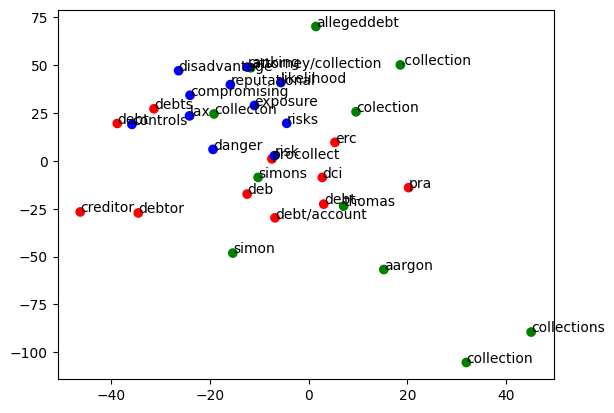

In [23]:
# get tsne coordinates and word labels for each group
x_coords1, y_coords1, word_labels1 = plot_closest_words_tsne(model, 'debt', size=10)
x_coords2, y_coords2, word_labels2 = plot_closest_words_tsne(model, 'collection', size=10)
x_coords3, y_coords3, word_labels3 = plot_closest_words_tsne(model, 'risk', size=10)

# create a list of colors for each group
colors1 = ['r'] * len(word_labels1)
colors2 = ['g'] * len(word_labels2)
colors3 = ['b'] * len(word_labels3)

# combine the coordinates and labels for all groups
x_coords = np.concatenate([x_coords1, x_coords2, x_coords3])
y_coords = np.concatenate([y_coords1, y_coords2, y_coords3])
word_labels = np.concatenate([word_labels1, word_labels2, word_labels3])
colors = np.concatenate([colors1, colors2, colors3])

# plot the scatter plot with different colors for each group
plt.scatter(x_coords, y_coords, c=colors)
for label, x, y in zip(word_labels, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()
